## Merging the data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import datetime
import seaborn as sns



path = "exam-data/flight-scrape-cypern"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file, index_col=[0])
    df = pd.concat([df, current_data])




In [2]:
df

,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp
0,63cy,2022-07-14,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,\n562 kr.,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2140
1,63cy,2022-07-14,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,\n974 kr.,https://kayak.dk/book/flight?code=SfCCG2uMV5.e...,20220506-2140
2,63cy,2022-07-14,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,\n549 kr.,https://kayak.dk/book/flight?code=SfCCG2uMV5.F...,20220506-2140
3,63cy,2022-07-14,6t. 50min.,1 stop ATH,17:30–01:20+1,Aegean Airlines,\n1.275 kr.,https://kayak.dk/book/flight?code=SfCCG2uMV5.1...,20220506-2140
4,63cy,2022-07-14,5t. 15min.,1 stop BEG,21:05–03:20+1,Air Serbia,\n1.676 kr.,https://kayak.dk/book/flight?code=SfCCG2uMV5.Z...,20220506-2140
...,...,...,...,...,...,...,...,...,...
115,63cy,2022-08-15,15t. 45min.,"2 stop STN, EIN",22:20–15:05+1,Ryanair,\n1.552 kr.,https://kayak.dk/book/flight?code=SjCCi0DJRF.F...,20220506-2338
116,63cy,2022-08-15,27t. 20min.,"2 stop OSL, ARN",07:10–11:30+1,Norwegian,\n1.588 kr.,https://kayak.dk/book/flight?code=SjCCi0DJRF.0...,20220506-2338
117,63cy,2022-08-15,24t. 50min.,1 stop HEL,19:15–21:05+1,Finnair,\n1.595 kr.,https://kayak.dk/book/flight?code=SjCCi0DJRF.a...,20220506-2338
118,63cy,2022-08-15,27t. 05min.,1 stop HEL,17:00–21:05+1,Finnair,\n1.595 kr.,https://kayak.dk/book/flight?code=SjCCi0DJRF.a...,20220506-2338


#### Cleaning price column

In [3]:

df['Price'] = [x[1:-5].replace(".","") for x in df['Price']]
df['Price'] = pd.to_numeric(df['Price'])

In [4]:
df = df.sort_values(by=['Price'], ascending=False)
df['Price']

26    5469
75    5330
74    5293
89    5222
64    5220
      ... 
0      480
2      473
0      449
0      256
1      187
Name: Price, Length: 2891, dtype: int64

### Converting company names to array

In [5]:
#Wizz Air, Ryanair
#["Wizz Air","Ryanair"]
def manipulate_list(x):
    x = '["' + x + '"]' 
    x = x.replace(', ', '","')
    return x

df['temp Company names'] = df['Company names']
df['temp Company names'] = df['Company names'].apply(manipulate_list)
df['temp Company names'] = df['temp Company names'].apply(eval)
df['temp Company names']

26         [Aegean Airlines]
75    [SAS, Aegean Airlines]
74    [SAS, Aegean Airlines]
89    [SAS, Aegean Airlines]
64    [SAS, Aegean Airlines]
               ...          
0                  [Ryanair]
2                  [Ryanair]
0                 [Wizz Air]
0                 [Wizz Air]
1                 [Wizz Air]
Name: temp Company names, Length: 2891, dtype: object

In [6]:
#checking if the type is list
for i, l in enumerate(df['temp Company names']):
    print(type(l))
    break

<class 'list'>


## How many times does a company appear in our dataset?

In [7]:

def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

to_1D(df['temp Company names']).value_counts()

Ryanair               664
Aegean Airlines       657
Lufthansa             429
Norwegian             265
SAS                   227
Wizz Air              197
Austrian Airlines     189
Flere flyselskaber    180
LOT                   154
SWISS                  95
easyJet                92
British Airways        79
Blue Air               72
airBaltic              70
Eurowings              56
TUS Airways            53
KLM                    43
Air Serbia             42
Finnair                40
Sky Express            26
Edelweiss Air          19
Cyprus Airways         17
Vueling                17
Royal Jordanian        16
Olympic Air            12
Czech Airlines         11
MEA                     9
Brussels Airlines       5
Smartwings              5
Air France              5
Flyr AS                 3
TUI Fly Belgium         2
Egypt Air               2
Bulgaria Air            2
Wideroe                 2
TUI fly                 1
Transavia               1
Pegasus Airlines        1
Air Malta   

### Making sure only 1 company appears under 'Company names'

In [8]:
df['Company names'].mask(df['Company names'].str.contains(','), 'Flere flyselskaber', inplace=True)
df.head(50)

,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines]
75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,Flere flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]"
74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]"
89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]"
64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]"
68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,British Airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways]
25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,Lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa]
51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,Austrian Airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines]
73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,Austrian Airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines]
72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,Lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa]


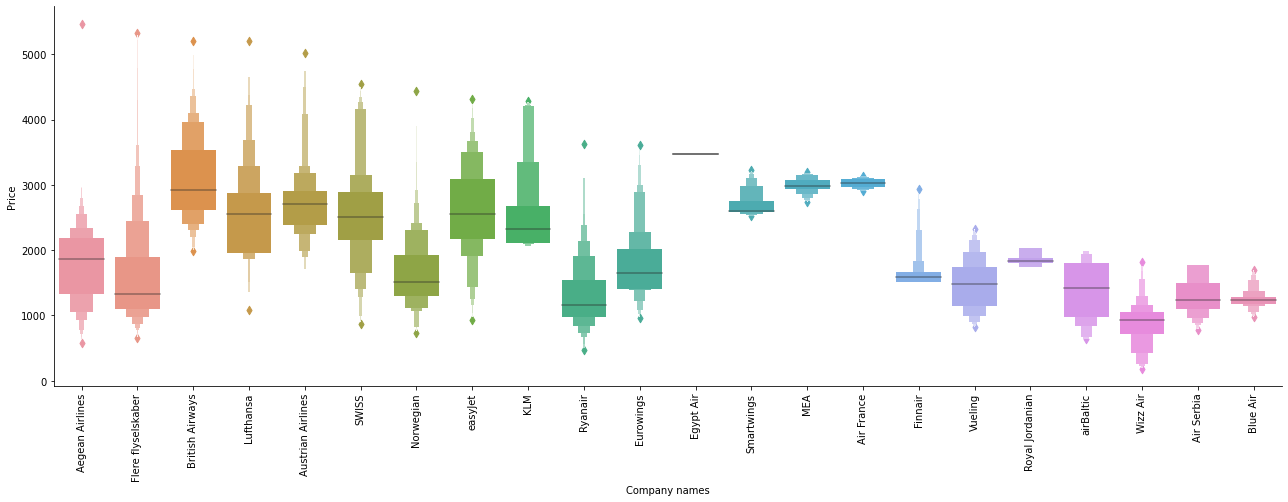

In [9]:
# From the catplot below we can see that Wizz Air is the cheapest, and also have the lowest median 
# British Airways have the highest median execpt for egypt air, but that is only one flight in comparison
# therefore we no not take Egypt Air to account

# Airline vs Price
df['Company names'] = df['Company names'].astype(str)

chart = sns.catplot(y = "Price", x = "Company names", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
chart.set_xticklabels(rotation=90)
plt.show()

In [10]:
df.head(3)

,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines]
75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,Flere flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]"
74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,Flere flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]"


In [11]:
#pd.set_option('display.max_colwidth', None)
df[df.Price == df.Price.min()]

,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
1,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,187,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313,[Wizz Air]


In [12]:
df[df.Price == df.Price.max()]

,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names
26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,Aegean Airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines]


### Lowest prices on 3 days

In [13]:
df.nsmallest(3, 'Price')
#top_2 = df.groupby('Name')['Score'].apply(lambda x: x.nsmallest(2)).reset_index('Name')
print(df[df['Out Date']=='2022-07-19'].nsmallest(3, 'Price')['Price'])
print(df[df['Out Date']=='2022-07-20'].nsmallest(3, 'Price')['Price'])
print(df[df['Out Date']=='2022-07-21'].nsmallest(3, 'Price')['Price'])

1     819
50    820
0     844
Name: Price, dtype: int64
2     632
34    646
0     724
Name: Price, dtype: int64
2     473
0     480
76    679
Name: Price, dtype: int64


### Lowest prices on 30 days

In [14]:
#TODO: convert into dataframe 
# consider the start date as 2021-february 1 st
start_date = datetime.date(2022, 7, 19)

# consider the end date as 2021-march 1 st
end_date = datetime.date(2022, 8, 15)

# delta time
delta = datetime.timedelta(days=1)

while (start_date <= end_date):
    from_date = start_date.strftime("%Y-%m-%d")
    print(from_date,df[df['Out Date']==from_date].nsmallest(2, 'Price')['Price'])
    start_date += delta

2022-07-19 1     819
50    820
Name: Price, dtype: int64
2022-07-20 2     632
34    646
Name: Price, dtype: int64
2022-07-21 2    473
0    480
Name: Price, dtype: int64
2022-07-22 85     947
86    1005
Name: Price, dtype: int64
2022-07-23 23    849
52    850
Name: Price, dtype: int64
2022-07-24 69    989
70    989
Name: Price, dtype: int64
2022-07-25 30    770
31    790
Name: Price, dtype: int64
2022-07-26 87    727
86    727
Name: Price, dtype: int64
2022-07-27 108    626
110    697
Name: Price, dtype: int64
2022-07-28 61    665
62    795
Name: Price, dtype: int64
2022-07-29 74    924
75    960
Name: Price, dtype: int64
2022-07-30 36    649
90    828
Name: Price, dtype: int64
2022-07-31 1    1054
0    1429
Name: Price, dtype: int64
2022-08-01 0    1429
2    3147
Name: Price, dtype: int64
2022-08-02 2     875
0    1060
Name: Price, dtype: int64
2022-08-03 2    1981
0    2375
Name: Price, dtype: int64
2022-08-04 2    1981
0    2542
Name: Price, dtype: int64
2022-08-05 0     577
1    212

### Categorizing deptare times

In [15]:
#Parts of the Day
#Morning     5 am to 12 pm (noon)

#Early morning    5 to 8 am
#Late morning     11 am to 12pm
#Afternoon     12 pm to 5 pm

#Early afternoon   1 to 3pm
#Late afternoon    4 to 5pm

#Evening     5 pm to 9 pm
#Early evening   5 to 7 pm
#Night         9 pm to 4 am*
def time_category (row):
    time = row['Out Time'][:2]
    time = int(time)
    if ((time >= 5) and (time <= 8)):
        return 'Early morning'
    if ((time > 8) and (time < 11)):
        return 'Morning'
    if((time >= 11) and (time <= 12)):
        return 'Late Morning'
    if ((time >= 13) and (time <= 15)):
        return 'Early afternoon'
    if ((time > 15) and (time <= 17)):
        return 'Late afternoon'
    if ((time > 17) and (time <= 19)):
        return 'Early evening'
    if ((time > 19) and (time <= 22)):
        return 'Late evening'
        
    return 'Night'
        
df['part of the day'] = df.apply(lambda row: time_category(row), axis=1)
df.groupby('part of the day')['Price'].mean()

part of the day
Early afternoon    1936.845890
Early evening      1808.490654
Early morning      2007.593882
Late Morning       1740.163435
Late afternoon     1842.714286
Late evening       1563.170483
Morning            2060.322767
Night              1754.507937
Name: Price, dtype: float64

In [16]:
df['part of the day'].value_counts()

Early morning      948
Late evening       393
Late Morning       361
Morning            347
Early afternoon    292
Late afternoon     273
Early evening      214
Night               63
Name: part of the day, dtype: int64

### Barchart showing the mean prices of each category

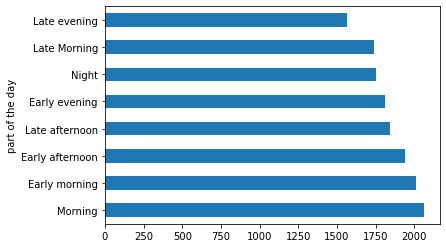

In [17]:
#df.groupby('part of the day')['Price'].mean().plot(kind='barh')
df.groupby('part of the day')['Price'].mean().sort_values(ascending=False).plot(kind='barh')


### How does the departure weekday affect the price?

### How does the amount of stops affect the price?

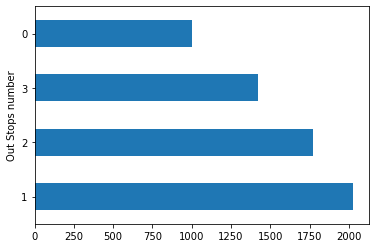

In [18]:
#direkte = 0, 1 stop = 1, 2 stop = 2
#search(substring, fullstring)
from re import search

def stop_category (row):
    if search('direkte',row['Out Stops']):
        return 0
    if (row['Out Stops'] != 'direkte'):
        return row['Out Stops'][:1]

df['Out Stops number'] = df.apply(lambda row: stop_category(row), axis=1)
#df.groupby('Out Stops number')['Price'].mean()
df.groupby('Out Stops number')['Price'].mean().sort_values(ascending=False).plot(kind='barh')

In [19]:
df.nsmallest(2, 'Price')['Price']

1    187
0    256
Name: Price, dtype: int64

In [20]:
# Who scored more points ?
df[df['Out Date']=='2022-07-19'].nsmallest(3, 'Price')['Price']
email_df = df[df.Price == df.Price].nsmallest(5, 'Price')
email_df



,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number
1,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,187,https://kayak.dk/book/flight?code=SiCCUS-HO_.1...,20220506-2313,[Wizz Air],Late evening,0
0,63cy,2022-08-07,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,256,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2313,[Wizz Air],Late evening,0
0,63cy,2022-08-14,4t. 05min.,direkte,20:35–01:40+1,Wizz Air,449,https://kayak.dk/book/flight?code=SjACRfks9x.H...,20220506-2335,[Wizz Air],Late evening,0
2,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,473,https://kayak.dk/book/flight?code=ShACTHZH0h.e...,20220506-2236,[Ryanair],Early morning,1
0,63cy,2022-07-21,14t. 30min.,1 stop GDN,07:50–23:20,Ryanair,480,https://kayak.dk/s/clickthrough.jsp?ctyp=Spons...,20220506-2236,[Ryanair],Early morning,1


### Cleaning data before heatmap

In [21]:
#Converting Out stops number to numeric
df['Out Stops number'] = pd.to_numeric(df['Out Stops number'])
for i, l in enumerate(df['Out Stops number']):
    print(type(l))
    break

<class 'int'>


### Heatmap 

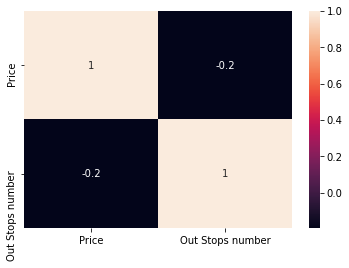

In [22]:
#TODO: column values to numeric: 
#part of the day kategoriseres = [1,2,3,4,5,6] (evt opdele til færre kategorier)
#out stops = [0,1,2,3]
#weekday / weekend --> [1,2]
sns.heatmap(df.corr(), annot=True)

## New dataset for airline ratings etc

In [23]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud,STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer
from torch.utils.data import DataLoader, Dataset

In [24]:
filename = "airline.csv"
df_rating = pd.read_csv(filename)
df_rating.airline_name.str.replace('(egyptair)', 'egypt-air')
df_rating.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0


## Sort sentiment into Positiv and Negativ

In [25]:

#Indeler sentiment værdi ud fra overall_rating
#Positiv - Negativ - (Neutral)
neutral_range = {"low": 5, "high": 6}
df_rating["sentiment"] = ""
df_rating["sentiment"].loc[df_rating["overall_rating"] <= neutral_range["low"]] = "negative"
df_rating["sentiment"].loc[df_rating["overall_rating"] >= neutral_range["high"]] = "positive"
df_rating.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,positive
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,...,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1,positive
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,...,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1,positive
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,...,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1,positive
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,...,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0,negative


In [26]:
#Tjekker længden af "content" og tilføjer en extra row med det 
df_rating['length'] = df_rating['content'].apply(len)
df_rating.head(1)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment,length
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,positive,424


## Compare length of  content with overall rating

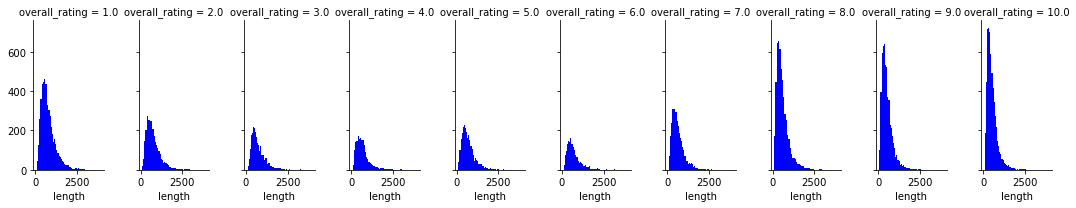

In [27]:
#Sammenligner textlængden af "content" med overall_rating
graph = sns.FacetGrid(data=df_rating,col='overall_rating', aspect= 0.5)
graph.map(plt.hist,'length',bins=50,color='blue')

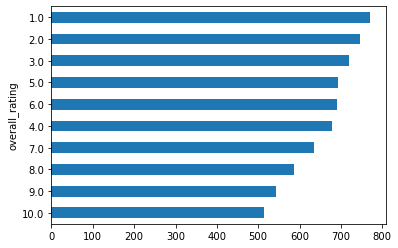

In [28]:
##Viser overall_rating ud fra længden af content gennemsnit
df_rating.groupby('overall_rating')['length'].mean().sort_values(ascending=True).plot(kind='barh')

## Wordcloud representation from positive and negative words

In [29]:
#X_train, X_validation, y_train, y_validation = train_test_split(df["content"], df["sentiment"], test_size=0.2,
#stratify=df["sentiment"])

filename = df_rating[['content', 'sentiment']]

# splitter dataset til train og et test dataset
train, test = train_test_split(filename,test_size = 0.1)

train_pos = train[train['sentiment'] == 'positive']
train_pos = train_pos['content']
train_neg = train[train['sentiment'] == 'negative']
train_neg = train_neg['content']


Positive words


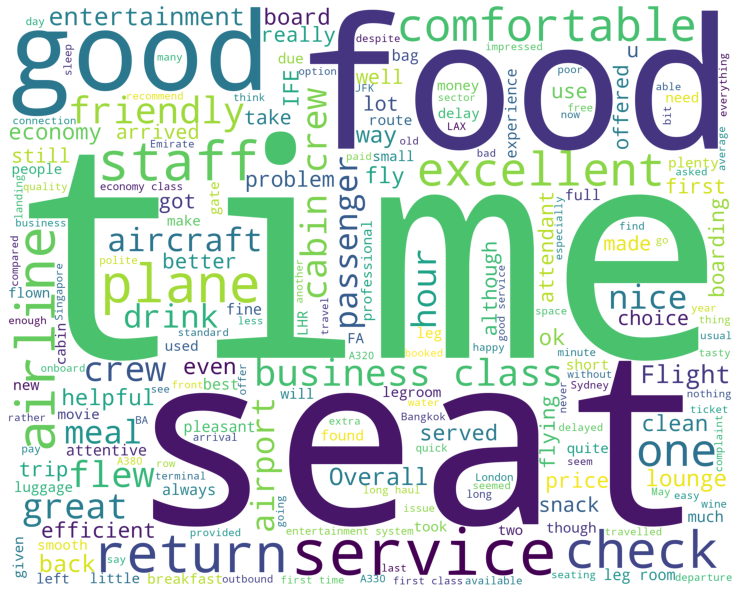

Negative words


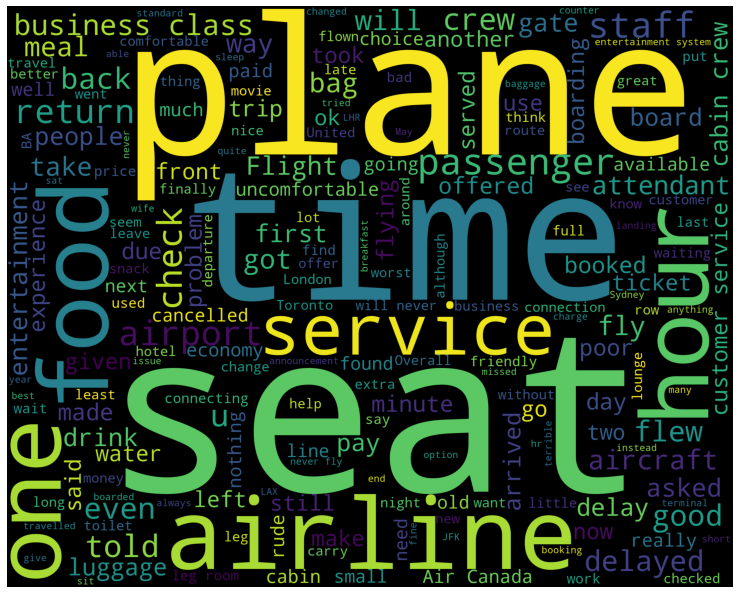

In [30]:


def wordcloud_draw(filename, color = 'black'):
    words = ' '.join(filename)
    cleaned_word = " ".join([word for word in words.split()
                            if 'flight' not in word
                                and not word.startswith('jfk')
                            ])
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

## Cleaning company names, difference between the two datasets

In [31]:
#
uniqueAirlines = df['Company names'].unique()
df['Company names'] = [x.replace(" ","-").lower() for x in df['Company names']]

df['Company names'].mask(df['Company names'].str.contains('klm'), 'klm-royal-dutch-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('swiss'), 'swiss-international-air-lines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('mea'), 'mea-middle-east-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('vueling'), 'vueling-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('royal-jordanian'), 'royal-jordanian-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('royal-jordanian'), 'royal-jordanian-airlines', inplace=True)
df['Company names'].mask(df['Company names'].str.contains('egypt-air'), 'egyptair', inplace=True)
df.head(50)

,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number
26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,aegean-airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines],Late Morning,1
75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,flere-flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]",Early afternoon,2
74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]",Early morning,2
89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]",Early morning,2
64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]",Early morning,2
68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,british-airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways],Late afternoon,1
25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa],Early morning,1
51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,austrian-airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines],Morning,1
73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,austrian-airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines],Early morning,1
72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa],Early morning,1


In [32]:
uniqueAirlines = df['Company names'].unique()

In [33]:
uniqueAirlinesRating = df_rating['airline_name'].unique()

In [34]:
#uniqueAirlines

In [35]:
#uniqueAirlinesRating

## Insert the average rating for each airline company

In [36]:
#Find gennemsnit af rating for de forskellige selskaber
gennemsnit = df_rating.groupby('airline_name')['overall_rating'].mean().apply(float).to_dict()
gennemsnit
gennemsnit['lufthansa']

6.993333333333333

In [37]:
def add_rating (row):
    NaN = float("NaN")
    airline_name = row['Company names']
    if(airline_name == 'flere-flyselskaber'):
        return NaN
    else:
        return gennemsnit[airline_name]
    

    #df['rating'] = gennemsnit[airline_name] #gennemsnits keys (bliver fundet via airline name) value (wizz-air = 7)
        
        
df['rating'] = df.apply(lambda row: add_rating(row), axis=1)
df.head(50)

#df.groupby('part of the day')['Price'].mean()




,Destination,Out Date,Out Duration,Out Stops,Out Time,Company names,Price,Url,timestamp,temp Company names,part of the day,Out Stops number,rating
26,63cy,2022-07-25,7t. 10min.,1 stop ATH,11:25–19:35,aegean-airlines,5469,https://kayak.dk/book/flight?code=ShAilJe5f-.R...,20220506-2249,[Aegean Airlines],Late Morning,1,7.823789
75,63cy,2022-07-16,9t. 25min.,"2 stop FRA, ATH",14:55–01:20+1,flere-flyselskaber,5330,https://kayak.dk/book/flight?code=SfCiIAnLeo.f...,20220506-2157,"[SAS, Aegean Airlines]",Early afternoon,2,NaN
74,63cy,2022-07-16,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5293,https://kayak.dk/book/flight?code=SfCiIAnLeo.t...,20220506-2157,"[SAS, Aegean Airlines]",Early morning,2,NaN
89,63cy,2022-07-30,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5222,https://kayak.dk/book/flight?code=SiAikpXBR-.t...,20220506-2306,"[SAS, Aegean Airlines]",Early morning,2,NaN
64,63cy,2022-07-17,7t. 40min.,"2 stop MUC, ATH",06:10–14:50,flere-flyselskaber,5220,https://kayak.dk/book/flight?code=SfDifPla15.t...,20220506-2201,"[SAS, Aegean Airlines]",Early morning,2,NaN
68,63cy,2022-07-24,7t. 45min.,1 stop LHR,16:30–01:15+1,british-airways,5202,https://kayak.dk/book/flight?code=ShBCIzkvOs.v...,20220506-2246,[British Airways],Late afternoon,1,5.881696
25,63cy,2022-07-25,7t. 40min.,1 stop MUC,06:10–14:50,lufthansa,5200,https://kayak.dk/book/flight?code=ShAilJe5f-.Z...,20220506-2249,[Lufthansa],Early morning,1,6.993333
51,63cy,2022-07-23,5t. 45min.,1 stop VIE,09:50–16:35,austrian-airlines,5027,https://kayak.dk/book/flight?code=ShBij_aZzv.F...,20220506-2243,[Austrian Airlines],Morning,1,6.110266
73,63cy,2022-07-16,8t. 30min.,1 stop VIE,07:05–16:35,austrian-airlines,4832,https://kayak.dk/book/flight?code=SfCiIAnLeo.7...,20220506-2157,[Austrian Airlines],Early morning,1,6.110266
72,63cy,2022-07-16,8t. 40min.,1 stop FRA,06:20–16:00,lufthansa,4792,https://kayak.dk/book/flight?code=SfCiIAnLeo.4...,20220506-2157,[Lufthansa],Early morning,1,6.993333


## Positive - Negative content

In [38]:
#from nltk.tokenize import word_tokenize
#from nltk.probability import FreqDist
#nltk.download('punkt')

#all_words = ' '.join([word for word in df['content'])
       
#content = df[['content'][1:1]]
#df['content'].mask(df['content'].str.contains('.').replace('.', ' '))
#lars = str(df['content']).replace(".","")
#per = df['content'] = str(df['content']).str.contains('.').replace('.', ' ')
#content = df['content'].iloc[:10]
#tester = "Jeg hader nisser i sær om fredagen hej hej hej hej hej nej nej nej to to to Jeg hader nisser i sær om fredagen hej hej hej hej hej nej nej nej to to to"
#words = nltk.word_tokenize(all_words)
#fd = FreqDist(words)
#fd.most_common(3)
#content
#pd.set_option('display.max_colwidth', None)
#stopwords = nltk.corpus.stopwords.words("english")
#words = nltk.word_tokenize(lars)
#fd = FreqDist(words)
#fd.most_common()
#fd.tabulate(10)


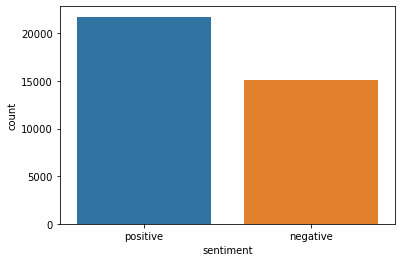

In [39]:
#Fordeling af positive og negative kommenatrer
#df_rating['sentiment'].value_counts()
df_rating = df_rating.dropna(subset=['overall_rating'])

sns.countplot(df_rating['sentiment'])

## Makes sentiments positiv and negativ to numbers 0 and 1

In [40]:
label = LabelEncoder()
df_rating['sentiment'] = label.fit_transform(df_rating['sentiment'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
df_rating.head(1)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,sentiment,length
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,...,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1,1,424


In [42]:
#Remove all special and numeric character from data and also remove stopwards an apply stemming
#nltk.download('omw-1.4')
#import nltk
#from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer
#lemmatizer=WordNetLemmatizer()

#nltk.download('punkt')
#nltk.download('wordnet')
#ps = PorterStemmer()

#stop_words = stopwords.words('english')
#lemmatizer=WordNetLemmatizer()
#for index,row in df_rating.iterrows():
#    filter_sentence = []
#    sentence = row['content'] 
#    sentence = re.sub("[^a-zA-Z]"," ", sentence)#cleaning
#    words = nltk.word_tokenize(sentence)#tokenization
#    words = [w for w in words if not w in stop_words] #stopwords removal
#    for word in words:
#        filter_sentence.append(lemmatizer.lemmatize(word))
    
#    filter_sentence = " ".join(filter_sentence)
#    df_rating.loc[index,'content'] = filter_sentence
#    print(filter_sentence)
#    print('')
#    print('')
    

In [43]:
x = df_rating['content'].head(33)
#pd.set_option('display.max_colwidth', None)
y = df_rating['sentiment'].head(33)

ps = PorterStemmer()
corpus = []

for i in range(len(x)):
    print(i)
    try:
        review = re.sub("[^a-zA-Z]"," ", x[i])#cleaning
         #review = nltk.word_tokenize(review)
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
        review = " " .join(review)
        corpus.append(review)
    except KeyError:
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


In [44]:
corpus

['outbound flight fra prn hour min flight thought drink snack sale sandwich soft drink serv complimentari inbound flight skp lju fra crj hour min flight skyshop menu seat pocket drink snack sale flight crew friendli secur check ljubljana airport transit passeng chao howev possibl go gate within min',
 'two short hop zrh lju lju vie fast crj seat comfort crew fine ground servic good loung quit nice',
 'flew zurich ljubljana jp newish crj flight almost full departur time servic board pleasant friendli femal flight attend bought coffe miner water nice fresh fill croissant eur good valu',
 'adria serv min flight ljubljana amsterdam brand new crj next gen huge improv cabin much spaciou higher ceil big window seat seem comfort legroom busi class separ main cabin though even standard back seat curtain food offer could slightli improv usual good meal adria',
 'waw skj economi free snack drink star allianc partner full legaci carrier fare basic budget airlin fli poland euro usd thirsti ask purc

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

In [46]:
X.shape

(33, 569)

## split data til train og test

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(df_rating["content"], df_rating["sentiment"], test_size=0.2,
#stratify=df_rating["sentiment"])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [48]:
X_train.shape , X_test.shape , Y_train.shape, Y_test.shape

((26, 569), (7, 569), (26,), (7,))

## Naive bayers model ->>>

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix 
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Tester model ved brug af test data

In [50]:
pred = mnb.predict(X_test)

## tjekker accuracy, matrix og classification report


In [51]:
print(accuracy_score(Y_test , pred))
print(confusion_matrix(Y_test , pred))
print(classification_report(Y_test , pred))

0.8571428571428571
[[0 1]
 [0 6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Forskel mellen acutal og predicted data

In [52]:
pd.DataFrame(np.c_[Y_test, pred] , columns=["Acutal" , "Predicted"])

,Acutal,Predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1


## New machine learning model

In [53]:
from sklearn.model_selection import train_test_split
Independent_var = df_rating['content']
Dependent_var = df_rating['sentiment']
IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)
print('IV_train : ' , len(IV_train))
print('IV_test : ' , len(IV_test))
print('DV_train : ' , len(DV_train))
print('DV_test : ' , len(DV_test))

IV_train :  33174
IV_test :  3687
DV_train :  33174
DV_test :  3687


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression( solver = 'lbfgs')
from sklearn.pipeline import Pipeline

In [55]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train, DV_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[1310,  186],
       [ 228, 1963]])

## Model predictions

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.887713588283157
Precision :  0.8884163517025412
Recall :  0.887713588283157


In [57]:
example = ['I am satisfied']
example1 = ['A real disappointment']
result = model.predict(example)
print(result)

[1]


## Saving model for later use

In [58]:
pd.DataFrame(np.c_[DV_test, predictions] , columns=["Acutal" , "Predicted"])

,Acutal,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
3682,1,1
3683,1,1
3684,1,1
3685,0,0


In [60]:
#import pandas as pd 
#vec = TfidfVectorizer()
#text_db = df_rating['content'].head(20)
#tf_idf =  vec.fit_transform(text_db)
#print(pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names()))

In [113]:
positive_content = df_rating[df_rating['sentiment'] == 1]['content'].str.lower()
positive_content = positive_content.values.tolist()
positive_content = [nltk.tokenize.wordpunct_tokenize(text) for text in positive_content]

negative_content = df_rating[df_rating['sentiment'] == 0]['content'].str.lower()
negative_content = negative_content.values.tolist()
negative_content = [nltk.tokenize.wordpunct_tokenize(text) for text in negative_content]
stopwords = nltk.corpus.stopwords.words('english')

In [114]:
from itertools import groupby

def clear_multiple_char(comment):        
    ti = []
    for words in comment:
        t = [''.join(["".join(i) for i, _ in groupby(word)]) if len(word)>10 else word for word in words]
        ti.append(t)
    return ti

In [115]:
positive_content= clear_multiple_char(positive_content)
negative_content= clear_multiple_char(negative_content)

In [116]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
#punctuation = string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
# Add numbers
#punctuation += '0123456789'

def comment_raiz(comment):
    text = []
    for lista in comment:
        valids = [stemmer.stem(word) for word in lista if word not in stopwords and word not in punctuation 
                  and len(word)>2]
        valids_true = [''.join([char for char in word if char not in punctuation]) for word in valids if 
                       len(''.join([char for char in word if char not in punctuation]))>0]
        text.append(valids_true)
    return text

In [117]:
positive_content = comment_raiz(positive_content)
negative_content = comment_raiz(negative_content)

In [124]:
from collections import Counter
def counter(positive_content):
    cnt = Counter()
    for words in positive_content:
        for word in words:
            cnt[word] += 1
    return cnt

In [127]:
from collections import Counter
def counter(positive_content):
    cnt = Counter()
    for words in negative_content:
        for word in words:
            cnt[word] += 1
    return cnt

In [128]:

toxic_comment_cnt = counter(positive_content)

negative_comment_cnt = counter(negative_content)

In [126]:
toxic_comment_cnt.most_common(10)

[('flight', 40086),
 ('seat', 20425),
 ('serv', 17690),
 ('good', 16279),
 ('tim', 14003),
 ('food', 12157),
 ('crew', 10345),
 ('airlin', 8797),
 ('cabin', 8181),
 ('staff', 8115)]

In [129]:
negative_comment_cnt.most_common(10)

[('flight', 34804),
 ('seat', 16792),
 ('serv', 11391),
 ('hour', 10496),
 ('tim', 9427),
 ('airlin', 9013),
 ('plan', 7959),
 ('food', 7004),
 ('delay', 6668),
 ('fly', 6510)]